In [39]:
# to read cobaya input files
from cobaya.yaml import yaml_load_file

# to run the sampler/minimizer
from cobaya.run import run as cobayaRun

# to load MCMC chains
from getdist import loadMCSamples

# to analyze the chains
# from getdist.mcsamples import MCSamplesFromCobaya
%matplotlib inline
import matplotlib.pyplot as plt
import getdist.plots as gdplt

import sys

# Load the Planck samples

In [43]:
pathDir = "../../data/planck_chains_2018/COM_CosmoParams_fullGrid_R3.01/"
runParams = "base"
runData = "plikHM_TTTEEE_lowl_lowE"

runPath = pathDir + runParams + "/" + runData + "/base_" + runData


# pathMinimum = runPath + ".minimum"
# pathParamName = runPath + ".paramname"
# pathSamples1 = runPath + "_1.txt"

In [36]:
samplesPlanck = loadMCSamples(runPath)

# Explore what can be output from the samples

((0.28432628017159195, 0.35043421982840806),
 (0.7825730836034318, 0.8418888163965682))

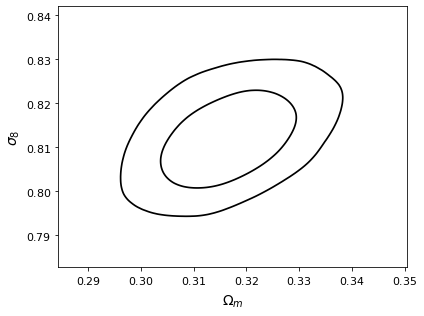

In [72]:
from getdist import plots
g = plots.get_single_plotter()
g.plot_2d(samplesPlanck, ['omegam', 'sigma8'])

Get the list of parameters

In [75]:
parNames = samplesPlanck.getParamNames()
# print(parNames)

Look at one of the parameters

In [97]:
iPar = 0

In [98]:
print("name: " + parNames.names[iPar].name)
print("label: " + parNames.names[iPar].label)
print("isDerived: " + str(parNames.names[iPar].isDerived))
print("comment: " + parNames.names[iPar].comment)
print("number: " + str(parNames.names[iPar].number))

name: omegabh2
label: \Omega_b h^2
isDerived: False
comment: 
number: None


Get some relevant info about the parameter considered

In [100]:
print("Mean: " + str(samplesPlanck.getMeans([iPar])))

Mean: [0.02235975]


In [103]:
print("Hard lower bound: " + str(samplesPlanck.getLower(parNames.names[iPar].name)))
print("Hard upper bound: " + str(samplesPlanck.getUpper(parNames.names[iPar].name)))

In [110]:
# maxLike = samplesPlanck.getBestFit(max_posterior=False)
maxPost = samplesPlanck.getBestFit(max_posterior=True)
margeStats = samplesPlanck.getMargeStats(include_bestfit=True)
likeStats = samplesPlanck.getLikeStats()
table = samplesPlanck.getTable(columns=1, include_bestfit=False)
latex = samplesPlanck.getLatex(params=None, limit=1, err_sig_figs=None)
samplesPlanck.getInlineLatex(parNames.names[iPar].name, limit=1, err_sig_figs=None)

'\\Omega_b h^2 = 0.02236\\pm 0.00015'

# Load the DES samples

In [44]:
runParams = "base"
runData = "DES_DESpriors"

runPath = pathDir + runParams + "/" + runData + "/base_" + runData

In [45]:
samplesDES = loadMCSamples(runPath)

In [52]:
# loadMCSamples?

# Take a look!

In [54]:
# from getdist import plots
# g = plots.get_single_plotter()
# g.plot_2d(samplesDES, ['omegam', 'sigma8'])

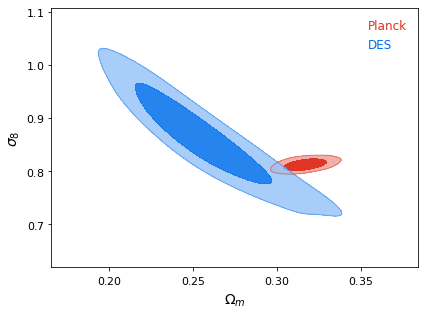

In [51]:
from getdist import plots
g = plots.get_single_plotter()
g.plot_2d([samplesPlanck, samplesDES], ['omegam', 'sigma8'], filled=True)
g.add_legend(['Planck', 'DES'], colored_text=True)
# g.export('output_file.pdf')

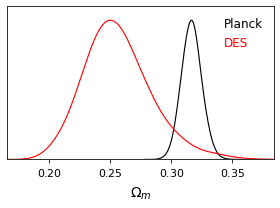

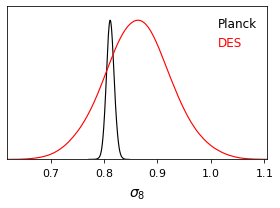

In [61]:
# Show the Omega_m tension
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([samplesPlanck, samplesDES], 'omegam', normalized=False)
# g.add_legend(['Planck', 'DES'], colored_text=False, legend_loc='upper right')
g.add_legend(['Planck', 'DES'], colored_text=True, legend_loc='upper right')

# sigma_8 is consistent 
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([samplesPlanck, samplesDES], 'sigma8', normalized=False)
g.add_legend(['Planck', 'DES'], colored_text=True, legend_loc='upper right')

# Assess the $\Omega_m$ tension

In [63]:
# Default limits are 1: 68%, 2: 95%, 3: 99% probability enclosed
# See  https://getdist.readthedocs.io/en/latest/analysis_settings.html
# and examples for below for changing analysis settings 
# (e.g. 2hidh limits, and how they are defined)

print("From Planck:")
print(samplesPlanck.getInlineLatex('omegam',limit=1))

print("From DES:")
print(samplesDES.getInlineLatex('omegam',limit=1))

From Planck:
\Omega_m = 0.3166\pm 0.0084
From DES:
\Omega_m = 0.256^{+0.023}_{-0.031}


# Select only the samples with low $\Omega_m$

In [ ]:
# Example of how to handle boundaries (samples are restricted to x0 >-0.5)
cut_samps = samps[samps[:,0]>-0.5,:]
cut_samples = MCSamples(samples=cut_samps, names = names, labels = labels, 
                        ranges={'x0':(-0.5, None)}, label='Cut samples')